# Creating logistic regression for dog vs cat classification

In [1]:
# importing the libraries
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:

y = pd.read_csv('data/labels.csv')

print(y.shape)
print(y)

(40, 1)
    label
0       1
1       0
2       1
3       0
4       1
5       0
6       1
7       0
8       1
9       0
10      1
11      0
12      1
13      0
14      1
15      0
16      1
17      0
18      1
19      0
20      1
21      0
22      1
23      0
24      1
25      0
26      1
27      0
28      1
29      0
30      1
31      0
32      1
33      0
34      1
35      0
36      1
37      0
38      1
39      0


In [28]:
# label to class mapping
pred = {0 : 'cat', 1 : 'dog'}

In [4]:
train_set = []

for i in range(20):
    img_dog = cv2.imread('data/train/dogs/dog' + str(i + 1) + '.jpg')
    img_dog = cv2.resize(img_dog, (100, 100))
    img_dog = np.array(img_dog).flatten()
    
    train_set.append(img_dog)
    
    img_cat = cv2.imread('data/train/cats/cat' + str(i + 1) + '.jpg')
    img_cat = cv2.resize(img_cat, (100, 100))
    img_cat = np.array(img_cat).flatten()
    
    train_set.append(img_cat)
      

In [5]:
print(len(train_set))
print(type(train_set))

40
<class 'list'>


In [6]:
# we need to convert this into numpy array

X = np.array(train_set)
print(X.shape)
print(type(X))
print("No. of training examples : ", X.shape[0])
print("Flattened image array size : ", X.shape[1])

(40, 30000)
<class 'numpy.ndarray'>
No. of training examples :  40
Flattened image array size :  30000


In [7]:
#splitting the data set into train and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [8]:
print("X train shape : ", X_train.shape)
print("y train shape : ", y_train.shape)
print("X test shape : ", X_test.shape)
print("y test shape : ", y_test.shape)

X train shape :  (32, 30000)
y train shape :  (32, 1)
X test shape :  (8, 30000)
y test shape :  (8, 1)


In [9]:
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression(penalty = 'l2', max_iter = 5)
lreg.fit(X_train, y_train) # fitting the model on the training data

LogisticRegression(max_iter=5)

In [10]:
lreg.score(X_train, y_train)

1.0

In [11]:
lreg.score(X_test, y_test)

0.5

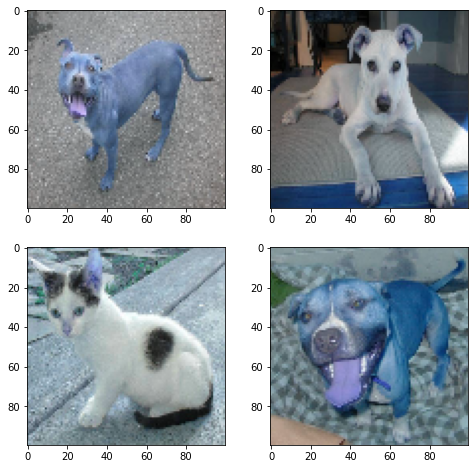

In [30]:
#plotting one dog and one cat image

plt.figure(figsize = (8, 8))
plt.subplot(2, 2, 1)
plt.imshow(X_test[0].reshape(100, 100, 3))

plt.subplot(2, 2, 2)
plt.imshow(X_test[1].reshape(100, 100, 3))

plt.subplot(2, 2, 3)
plt.imshow(X_train[0].reshape(100, 100, 3))

plt.subplot(2, 2, 4)
plt.imshow(X_train[1].reshape(100, 100, 3))



In [24]:
pred[lreg.predict(X_test[0].reshape(1, -1))[0]]

'dog'

In [25]:
pred[lreg.predict(X_test[1].reshape(1, -1))[0]]

'cat'

In [23]:
pred[lreg.predict(X_train[0].reshape(1, -1))[0]]

'cat'

In [29]:
pred[lreg.predict(X_train[1].reshape(1, -1))[0]]

'dog'